In [1]:
!python --version

Python 3.8.15


In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [3]:
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

In [4]:
import os
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [5]:
!tar xf spark-3.3.1-bin-hadoop3.tgz

In [6]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 42 kB/s 
     |████████████████████████████████| 200 kB 62.2 MB/s 
     |████████████████████████████████| 199 kB 16.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=1ed84800761dc88a59009420e651c926f7455a46fdb8ebc91b369ee921be9944
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [7]:
from pyspark.sql import SparkSession

In [8]:
spark = SparkSession.builder.master("local[*]")

In [9]:
spark

In [10]:
spark =SparkSession.builder.appName("Countries").getOrCreate()

In [48]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud

In [13]:
#Data Import
countries = pd.read_csv('/content/countries_gdp.csv')

In [14]:
#Data Description
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [15]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [16]:
countries.describe(include='all')

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227,227,224,224,226.000000,209,223,225,225,225,205,224,223,212,211,212
unique,227,11,NaN,NaN,219,151,157,220,NaN,140,214,203,162,209,6,220,201,150,155,167
top,Afghanistan,SUB-SAHARAN AFRICA,NaN,NaN,"66,6","0,00",0,"9,95",NaN,"99,0","269,5",0,0,100,2,"20,48","5,28","0,01","0,17","0,684"
freq,1,51,NaN,NaN,2,44,62,3,NaN,13,2,9,28,8,111,2,2,8,4,5
mean,NaN,NaN,2.874028e+07,5.982270e+05,NaN,NaN,NaN,NaN,9689.823009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.178913e+08,1.790282e+06,NaN,NaN,NaN,NaN,10049.138513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,7.026000e+03,2.000000e+00,NaN,NaN,NaN,NaN,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.376240e+05,4.647500e+03,NaN,NaN,NaN,NaN,1900.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.786994e+06,8.660000e+04,NaN,NaN,NaN,NaN,5550.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.749777e+07,4.418110e+05,NaN,NaN,NaN,NaN,15700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
print(countries.isnull().sum())

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


In [18]:
countries.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [19]:
countries.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality_rate","gdp_per_capita",
                  "literacy_rate","telecom","arable","crops","other","climate","birthrate","deathrate","agriculture","industry",
                  "service"])

In [20]:

countries.country = countries.country.astype('category')
countries.region = countries.region.astype('category')
#Coverting the String Values to Numnerical Values
countries.density = countries.density.str.replace(",",".").astype(float)
countries.coastline_area_ratio = countries.coastline_area_ratio.str.replace(",",".").astype(float)
countries.net_migration = countries.net_migration.str.replace(",",".").astype(float)
countries.infant_mortality_rate = countries.infant_mortality_rate.str.replace(",",".").astype(float)
countries.literacy_rate = countries.literacy_rate.str.replace(",",".").astype(float)
countries.telecom = countries.telecom.str.replace(",",".").astype(float)
countries.arable = countries.arable.str.replace(",",".").astype(float)
countries.crops = countries.crops.str.replace(",",".").astype(float)
countries.other = countries.other.str.replace(",",".").astype(float)
countries.climate = countries.climate.str.replace(",",".").astype(float)
countries.birthrate = countries.birthrate.str.replace(",",".").astype(float)
countries.deathrate = countries.deathrate.str.replace(",",".").astype(float)
countries.agriculture = countries.agriculture.str.replace(",",".").astype(float)
countries.industry = countries.industry.str.replace(",",".").astype(float)
countries.service = countries.service.str.replace(",",".").astype(float)



In [21]:
#Checking the DataType After Conversion
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   country                227 non-null    category
 1   region                 227 non-null    category
 2   population             227 non-null    int64   
 3   area                   227 non-null    int64   
 4   density                227 non-null    float64 
 5   coastline_area_ratio   227 non-null    float64 
 6   net_migration          224 non-null    float64 
 7   infant_mortality_rate  224 non-null    float64 
 8   gdp_per_capita         226 non-null    float64 
 9   literacy_rate          209 non-null    float64 
 10  telecom                223 non-null    float64 
 11  arable                 225 non-null    float64 
 12  crops                  225 non-null    float64 
 13  other                  225 non-null    float64 
 14  climate                205 non-null    flo

In [22]:
countries.count()

country                  227
region                   227
population               227
area                     227
density                  227
coastline_area_ratio     227
net_migration            224
infant_mortality_rate    224
gdp_per_capita           226
literacy_rate            209
telecom                  223
arable                   225
crops                    225
other                    225
climate                  205
birthrate                224
deathrate                223
agriculture              212
industry                 211
service                  212
dtype: int64

In [23]:
countries.describe()

,population,area,density,coastline_area_ratio,net_migration,infant_mortality_rate,gdp_per_capita,literacy_rate,telecom,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


[Text(33.0, 0.5, 'Data Points'),
 Text(0.5, 14.09375, 'Columns'),
 Text(0.5, 1.0, 'Missing Data')]

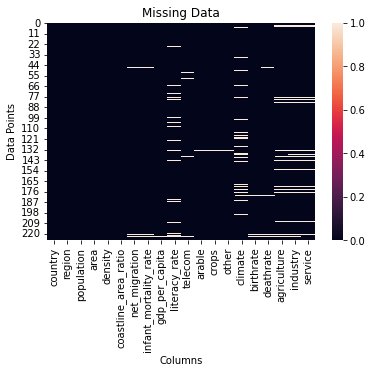

In [24]:
sns.heatmap(countries.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

In [25]:
countries.climate.unique()

array([1. , 3. , 2. , nan, 4. , 1.5, 2.5])

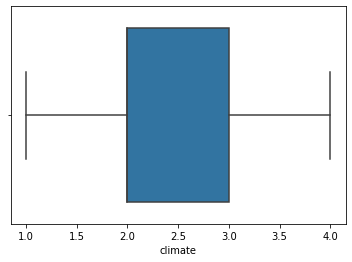

In [26]:
sns.boxplot(x=countries["climate"])

In [27]:
countries['net_migration'].fillna(0, inplace=True)
countries['infant_mortality_rate'].fillna(0, inplace=True)
countries['gdp_per_capita'].fillna(2500, inplace=True)
countries['literacy_rate'].fillna(countries.groupby('region')['literacy_rate'].transform('mean'), inplace= True)
countries['telecom'].fillna(countries.groupby('region')['telecom'].transform('mean'), inplace= True)
countries['arable'].fillna(0, inplace=True)
countries['crops'].fillna(0, inplace=True)
countries['other'].fillna(0, inplace=True)
countries['climate'].fillna(0, inplace=True)
countries['birthrate'].fillna(countries.groupby('region')['birthrate'].transform('mean'), inplace= True)
countries['deathrate'].fillna(countries.groupby('region')['deathrate'].transform('mean'), inplace= True)
countries['agriculture'].fillna(0.17, inplace=True)
countries['service'].fillna(0.8, inplace=True)
countries['industry'].fillna((1 - countries['agriculture'] - countries['service']), inplace= True)

In [28]:
#Checking After Filling Missing Values
print(countries.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            0
infant_mortality_rate    0
gdp_per_capita           0
literacy_rate            0
telecom                  0
arable                   0
crops                    0
other                    0
climate                  0
birthrate                0
deathrate                0
agriculture              0
industry                 0
service                  0
dtype: int64


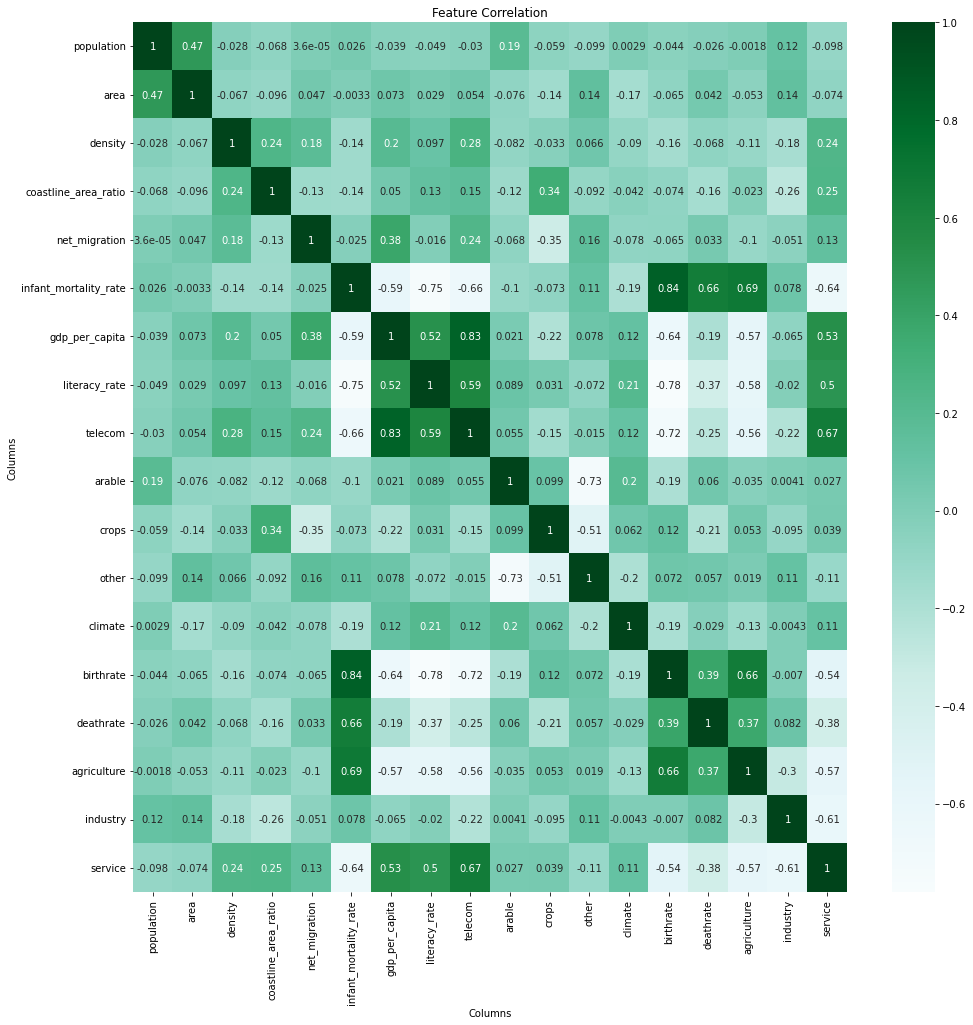

In [31]:
#Correlation Map
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(countries.corr(), annot=True, ax=ax, cmap='BuGn').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

[Text(33.0, 0.5, 'Data Points'),
 Text(0.5, 14.09375, 'Columns'),
 Text(0.5, 1.0, 'Missing Data')]

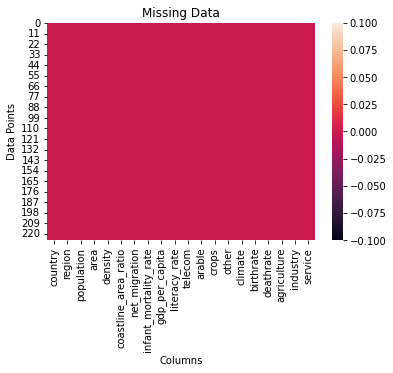

In [32]:
sns.heatmap(countries.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

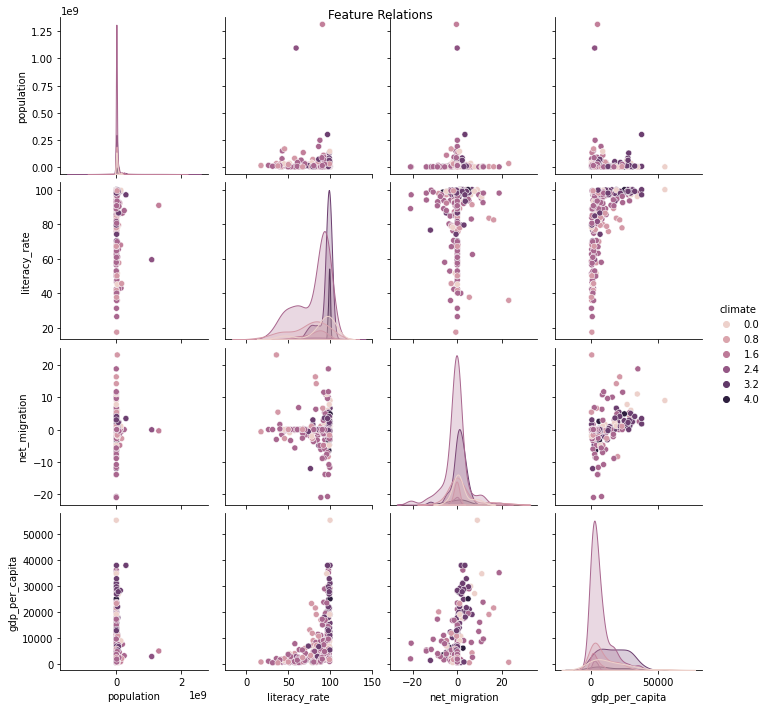

In [34]:
g = sns.pairplot(countries[['population', 'literacy_rate', 'net_migration', 'gdp_per_capita', 'climate']], hue='climate')
g.fig.suptitle('Feature Relations')
plt.show()

<ipython-input-35-3e2973253394>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(1, 1, 1)


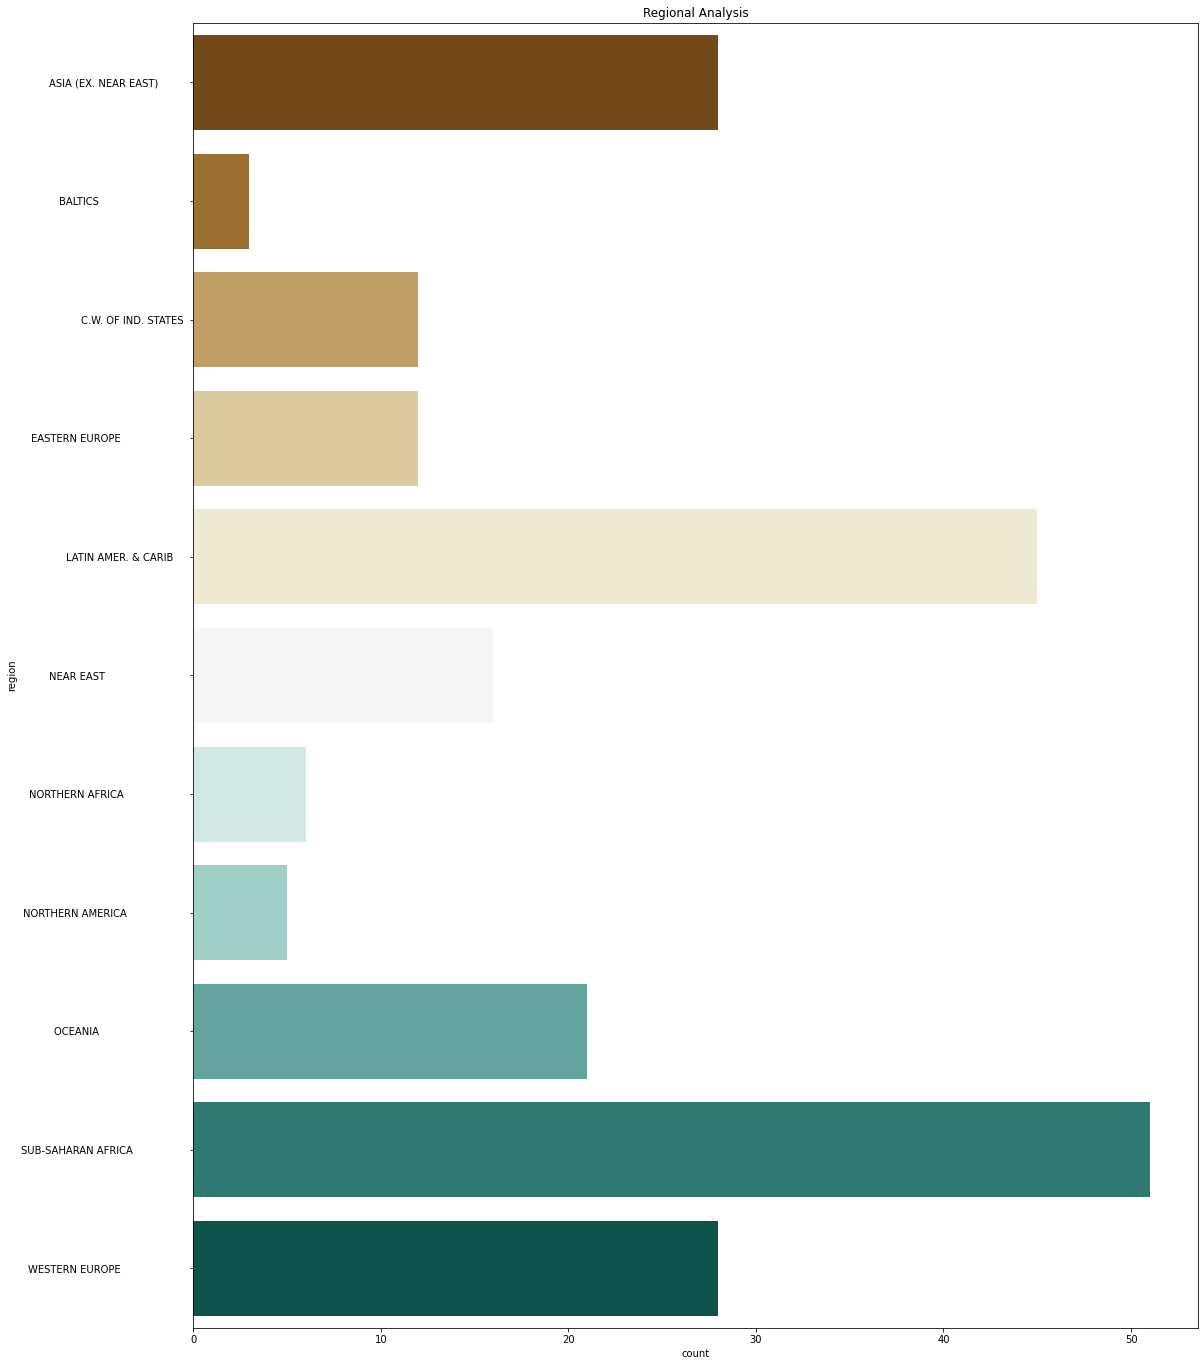

In [35]:
#Region Analysis
fig = plt.figure(figsize=(18, 24))
plt.title('Regional Analysis')
ax1 = fig.add_subplot(1, 1, 1)
sns.countplot(data= countries, y= 'region', ax= ax1, palette='BrBG')
plt.show()

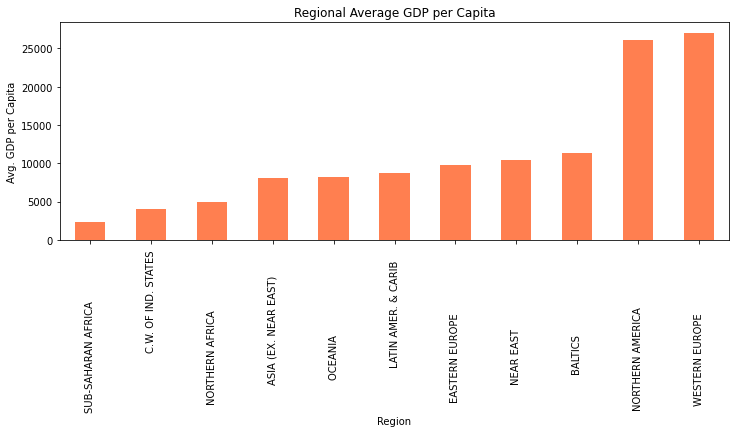

In [36]:
#GDP Analysis with Region
fig = plt.figure(figsize=(12, 4))
countries.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar', color='coral')
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Avg. GDP per Capita')
plt.show()

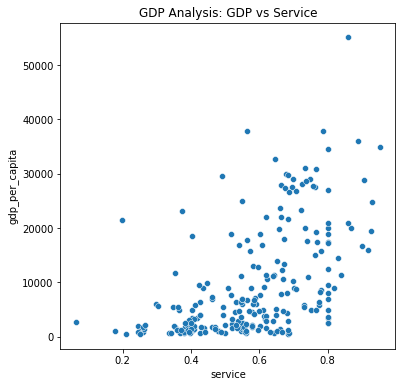

In [37]:
#GDP vs Service
fig = plt.figure(figsize=(6, 6))
sns.scatterplot(data= countries, x= 'service', y= 'gdp_per_capita')
plt.title('GDP Analysis: GDP vs Service')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


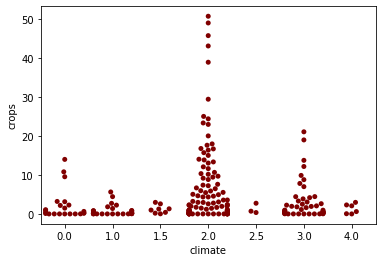

In [38]:
#Which Climate is  suitable for the Large Production of Crops 
sns.swarmplot(x='climate',y='crops',data=countries,color='maroon')
plt.show()

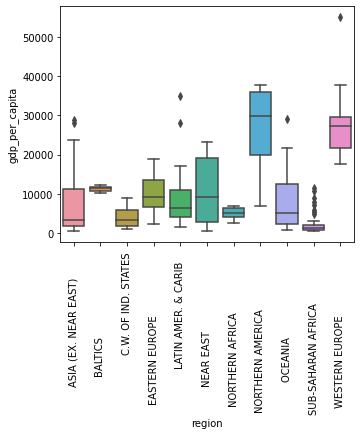

In [44]:
sns.boxplot(y=countries['gdp_per_capita'],x= countries['region'])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

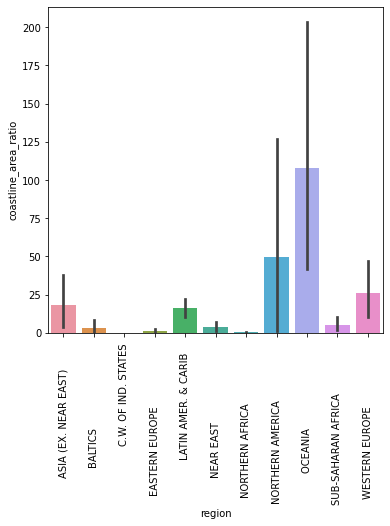

In [46]:
#Which Region has the more of CoastlandArea
fig = plt.figure(figsize=(6, 6))
sns.barplot(x='region',y='coastline_area_ratio',data=countries)
plt.xticks(rotation=90)
plt.show()

In [45]:
#Country vs Industry
industry = countries.loc[:,['country','industry']]
industry.sort_values(by = ['industry'],inplace=True,ascending=False)
industry_bar = px.bar(industry[:10],x='country',y='industry',title="Top 10 Countries with Most Industry")
industry_bar.show()


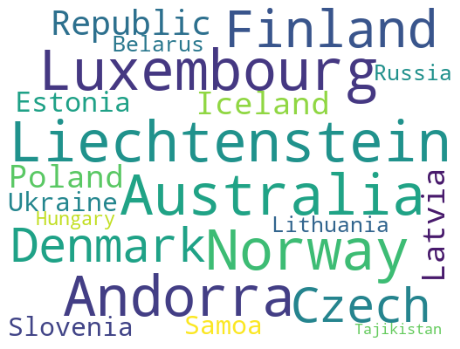

In [62]:
#Top Countries with Highest Literacy Rate 
literacy_rate = countries.loc[:,['country','literacy_rate']]
literacy_rate.columns=['country','literacy_rate']
highest_literacy_rate=literacy_rate.sort_values(by='literacy_rate',ascending=False)[:20]
literacy_rate_countries = highest_literacy_rate.country
plt.subplots(figsize=(8,8))
highest_literacy_rate_wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(literacy_rate_countries))
plt.imshow(highest_literacy_rate_wordcloud)
plt.axis('off')
plt.savefig('literacy.png')

plt.show()

In [90]:
#Which Country Uses Most of their Land for Production of Crops
most_used_arable=countries.loc[:,['country','arable']]
most_used_arable=most_used_arable.sort_values(by='arable',ascending=False)
arable_bar=px.bar(most_used_arable[:10],x='country',y='arable',  barmode='group',color='arable')
arable_bar.show()

In [ ]:
# #Finding Countries Leading Sectors
# agr=list(countries.agriculture)
# ind=list(countries.industry)
# serv=list(countries.service)
# gdp=list(countries['gdp_per_capita'])
# leading_sector=[]
# for i in range(211):
#     x=max(agr[i],ind[i],serv[i])
#     if x== agr[i]:
#         leading_sector.append('agriculture')
#     elif x==ind[i]:
#         leading_sector.append('industry')
#     elif x==serv[i]:
#         leading_sector.append('service')
# country = list(countries.country)
# dataSector=pd.DataFrame({"Country":country,
#                          "Agriculture":agr,
#                          "Industry":ind,
#                          "Service":serv,
#                          "LeadingSector":leading_sector,
#                          "GDP":gdp})
# fig = px.scatter(dataSector, x="Country", y="GDP",color="LeadingSector")
# fig.show()

In [95]:
#Countries Which uses most of the Mobile Technology 
telecom_countries = countries.loc[:,['country','telecom']]
telecom_countries=telecom_countries.sort_values(by='telecom',ascending=False)
fig = px.scatter(telecom_countries, x="country", y="telecom",title="The Country uses most of their Mobile Technology")

fig.show()

In [113]:
#Sector Distribution
dataSector=countries.loc[:,['country','agriculture','industry','service','gdp_per_capita']]
dataSector.dropna(inplace=True)

sector_distribution = px.scatter_3d(dataSector, x='agriculture', y='industry', z='service',
                    color='country',
                    title='Sector Distribution',  
                   )
sector_distribution.show()

In [96]:
#Top 5 countries in terms of coastline

countries[["country","region","coastline_area_ratio"]].sort_values(by='coastline_area_ratio',ascending=False).head(5).set_index("country")

,region,coastline_area_ratio
country,,
"Micronesia, Fed. St.",OCEANIA,870.66
Palau,OCEANIA,331.66
N. Mariana Islands,OCEANIA,310.69
Maldives,ASIA (EX. NEAR EAST),214.67
Monaco,WESTERN EUROPE,205.00


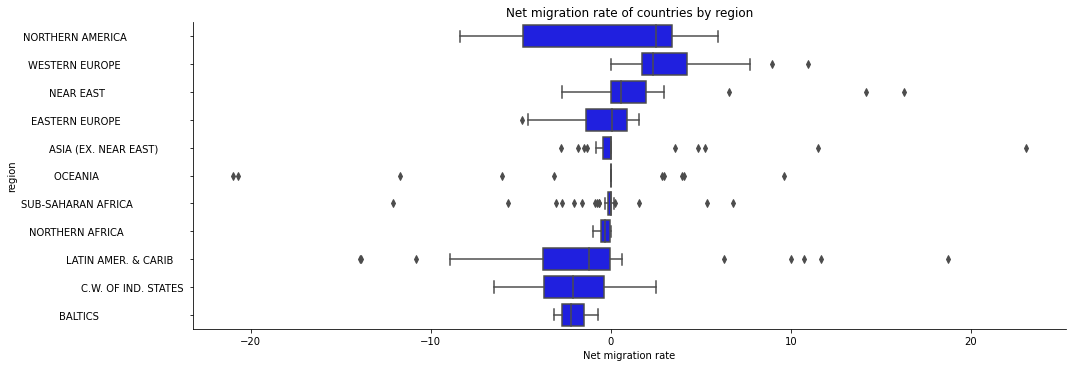

In [98]:
#Boxplot of Net migration of countries by region
sort_net_migration = countries.groupby('region')['net_migration'].median().sort_values(ascending=False).index
migration = sns.catplot(data=countries,y="region",x="net_migration",kind="box",color="blue",height=5,aspect=3,order=sort_net_migration)
plt.title("Net migration rate of countries by region")
plt.xlabel("Net migration rate")
plt.show()

In [100]:
#Top 5 countries in terms of crops Production

countries[["country","region","crops"]].sort_values(by='crops',ascending=False).head(5).set_index("country")

,region,crops
country,,
Kiribati,OCEANIA,50.68
Sao Tome & Principe,SUB-SAHARAN AFRICA,48.96
"Micronesia, Fed. St.",OCEANIA,45.71
Tonga,OCEANIA,43.06
Marshall Islands,OCEANIA,38.89


In [103]:
#Countries with Least Literacy Rate 
lowest_literacy_rate =countries[["country","region","literacy_rate"]].sort_values(by='literacy_rate',ascending=False).set_index("country")
lowest_literacy_rate[~lowest_literacy_rate['literacy_rate'].isna()].sort_values(by='literacy_rate').head(5)

,region,literacy_rate
country,,
Niger,SUB-SAHARAN AFRICA,17.6
Burkina Faso,SUB-SAHARAN AFRICA,26.6
Sierra Leone,SUB-SAHARAN AFRICA,31.4
Guinea,SUB-SAHARAN AFRICA,35.9
Afghanistan,ASIA (EX. NEAR EAST),36.0


In [106]:
#Bottom 5 countries in terms of Mobile Technology
telecom_lowest = countries[["country","region","telecom"]].sort_values(by='telecom',ascending=False).set_index("country")
telecom_lowest [~telecom_lowest ['telecom'].isna()].sort_values(by='telecom').head(5)

,region,telecom
country,,
"Congo, Dem. Rep.",SUB-SAHARAN AFRICA,0.2
Chad,SUB-SAHARAN AFRICA,1.3
Niger,SUB-SAHARAN AFRICA,1.9
Liberia,SUB-SAHARAN AFRICA,2.3
Central African Rep.,SUB-SAHARAN AFRICA,2.3
